# 🚗 Análise Comparativa de Heurísticas de Tráfego Urbano

Análise detalhada e comparativa entre diferentes estratégias de controle de semáforos, incluindo métricas avançadas de performance, congestionamento e backlog.

## Métricas Coletadas

### 📊 Informações da Simulação
| Métrica | Descrição | Unidade |
|---------|-----------|---------|
| **Heurística** | Estratégia de controle utilizada | - |
| **Duração Solicitada** | Tempo de simulação planejado | segundos |
| **Duração Real** | Tempo real de execução | segundos |
| **Grade** | Tamanho da malha viária | - |
| **FPS** | Frames por segundo da simulação | fps |

### 🚗 Métricas de Performance
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Veículos Concluídos** | Total de veículos que completaram a simulação | Contador incremental quando `veiculo.ativo = False` | unidades |
| **Throughput por Minuto** | Taxa de processamento de veículos | `veiculos_concluidos / (duracao_real / 60)` | veículos/min |
| **Eficiência Média** | Percentual de tempo em movimento vs tempo total | `((tempo_viagem - tempo_parado) / tempo_viagem) * 100` | % |
| **Score da Heurística** | Pontuação composta de desempenho | `(0.5 * tm_norm + 0.3 * tp_norm + 0.2 * v_norm) * 100` | 0-100 |

### ⏱️ Métricas de Tempo
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Tempo de Viagem Médio** | Tempo total que um veículo leva para completar sua jornada | `tempo_viagem_total / veiculos_concluidos / FPS` | segundos |
| **Tempo Parado Médio** | Tempo médio que veículos ficam parados (velocidade < 0.1) | `tempo_parado_total / veiculos_concluidos / FPS` | segundos |
| **Tempo de Viagem P50** | Mediana dos tempos de viagem | Percentil 50 dos tempos de viagem | segundos |
| **Tempo de Viagem P95** | Percentil 95 dos tempos de viagem | Percentil 95 dos tempos de viagem | segundos |

### 🏃 Métricas de Velocidade
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Velocidade Média Global** | Velocidade média considerando todos os veículos | `soma_velocidades / total_veiculos` | px/s |
| **Velocidade Média Ativa** | Velocidade média apenas dos veículos em movimento | `soma_velocidades_ativas / veiculos_ativos` | px/s |
| **Velocidade Máxima** | Velocidade máxima configurada | Valor de configuração | px/s |

### 🚦 Métricas de Congestionamento
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Paradas Médias por Veículo** | Número médio de paradas por veículo | `total_paradas / veiculos_concluidos` | paradas/veículo |
| **Veículos Aguardando (Instante)** | Veículos aguardando no momento da medição | Contagem instantânea | unidades |
| **Maior Fila em Cruzamento** | Maior fila observada em qualquer cruzamento | `max(filas_cruzamentos)` | veículos |

### 📦 Métricas de Backlog
| Métrica | Descrição | Cálculo no Código | Unidade |
|---------|-----------|-------------------|---------|
| **Backlog Total Atual** | Total de veículos no backlog no momento | Contagem instantânea | unidades |
| **Backlog Máximo Total** | Maior backlog observado durante a simulação | `max(backlog_historico)` | unidades |
| **Backlog Gerado Total** | Total de veículos gerados para o backlog | Contador incremental | unidades |
| **Backlog Despachado Total** | Total de veículos despachados do backlog | Contador incremental | unidades |
| **Backlog Médio** | Média do backlog durante toda a simulação | `soma_backlog / numero_medicoes` | unidades |

### ⚙️ Configuração da Simulação
| Métrica | Descrição | Unidade |
|---------|-----------|---------|
| **Taxa de Geração** | Taxa de geração de novos veículos | veículos/frame |
| **FPS Simulação** | Frames por segundo da simulação | fps |
| **Intervalo Métricas** | Intervalo entre coleta de métricas | frames |

## Detalhes dos Cálculos

### Tempo de Viagem
- **Rastreamento**: Cada veículo incrementa `tempo_viagem` a cada frame
- **Cálculo**: Soma total dividida pelo número de veículos concluídos
- **Normalização**: Convertido de frames para segundos dividindo por FPS
- **Percentis**: P50 (mediana) e P95 calculados para análise de distribuição

### Tempo Parado
- **Condição**: Velocidade < 0.1 (considerado parado)
- **Rastreamento**: Incrementado a cada frame quando veículo está parado
- **Uso**: Indicador de congestionamento e eficiência do tráfego

### Score da Heurística
- **Componentes**:
  - `tm_norm`: Tempo médio normalizado (0-1, melhor = menor tempo)
  - `tp_norm`: Tempo parado normalizado (0-1, melhor = menor tempo)
  - `v_norm`: Veículos processados normalizados (0-1, melhor = mais veículos)
- **Pesos**: 50% tempo viagem + 30% tempo parado + 20% throughput
- **Escala**: 0-100 pontos

### Eficiência
- **Fórmula**: `(Tempo em Movimento / Tempo Total) * 100`
- **Interpretação**: 100% = veículo nunca parou, 0% = veículo sempre parado
- **Uso**: Medida de fluidez do tráfego

### Backlog
- **Geração**: Veículos são adicionados ao backlog quando não conseguem prosseguir
- **Despacho**: Veículos são removidos do backlog quando podem prosseguir
- **Eficiência**: `(Despachados / Gerados) * 100`
- **Uso**: Indicador de capacidade do sistema de processar demanda

## Coleta de Dados

- **Frequência**: A cada `CONFIG.INTERVALO_METRICAS` frames (padrão: 5 segundos)
- **Armazenamento**: Listas por heurística no `GerenciadorMetricas`
- **Exportação**: Relatórios JSON com timestamp automático
- **Localização**: Diretório `relatorios/`

## Interpretação dos Resultados

### Métricas de Performance
- **Throughput Alto**: Mais veículos processados por unidade de tempo
- **Eficiência Alta**: Tráfego fluido, poucas interrupções
- **Score Alto**: Combinação equilibrada de todas as métricas

### Métricas de Tempo
- **Tempo de Viagem Baixo**: Heurística eficiente, menos congestionamento
- **Tempo Parado Baixo**: Melhor controle de fluxo, menos esperas
- **P95 Baixo**: Consistência na performance, poucos casos extremos

### Métricas de Velocidade
- **Velocidade Global Alta**: Sistema eficiente em geral
- **Velocidade Ativa Alta**: Boa fluidez quando em movimento
- **Diferença Pequena**: Pouco tempo perdido em paradas

### Métricas de Congestionamento
- **Paradas por Veículo Baixas**: Menos interrupções no fluxo
- **Veículos Aguardando Poucos**: Sistema processando demanda eficientemente
- **Filas Pequenas**: Bom controle de fluxo nos cruzamentos

### Métricas de Backlog
- **Eficiência Alta**: Sistema processando bem a demanda
- **Backlog Atual Baixo**: Poucos veículos aguardando processamento
- **Backlog Máximo Controlado**: Sistema não sobrecarregado

Encontrados 3 arquivos de relatório.
📊 Dados carregados com sucesso!
🔍 Heurísticas analisadas: VERTICAL_HORIZONTAL, ADAPTATIVA_DENSIDADE, RANDOM_OPEN_CLOSE
📈 Total de registros: 3

--- Amostra dos Dados Carregados ---
             heuristica  duracao_solicitada  duracao_real  \
0   VERTICAL_HORIZONTAL                 200    200.011207   
1  ADAPTATIVA_DENSIDADE                 200    200.006974   
2     RANDOM_OPEN_CLOSE                 200    200.008593   

                       inicio                         fim grade  fps  \
0  2025-10-20T19:22:19.913691  2025-10-20T19:25:39.924898   3x3   60   
1  2025-10-20T19:18:23.328134  2025-10-20T19:21:43.335109   3x3   60   
2  2025-10-20T19:14:42.198089  2025-10-20T19:18:02.206682   3x3   60   

   veiculos_concluidos  tempo_viagem_medio  tempo_parado_medio  ...  \
0                  395           56.361941           18.569072  ...   
1                  403           57.175889           19.201820  ...   
2                  404           59

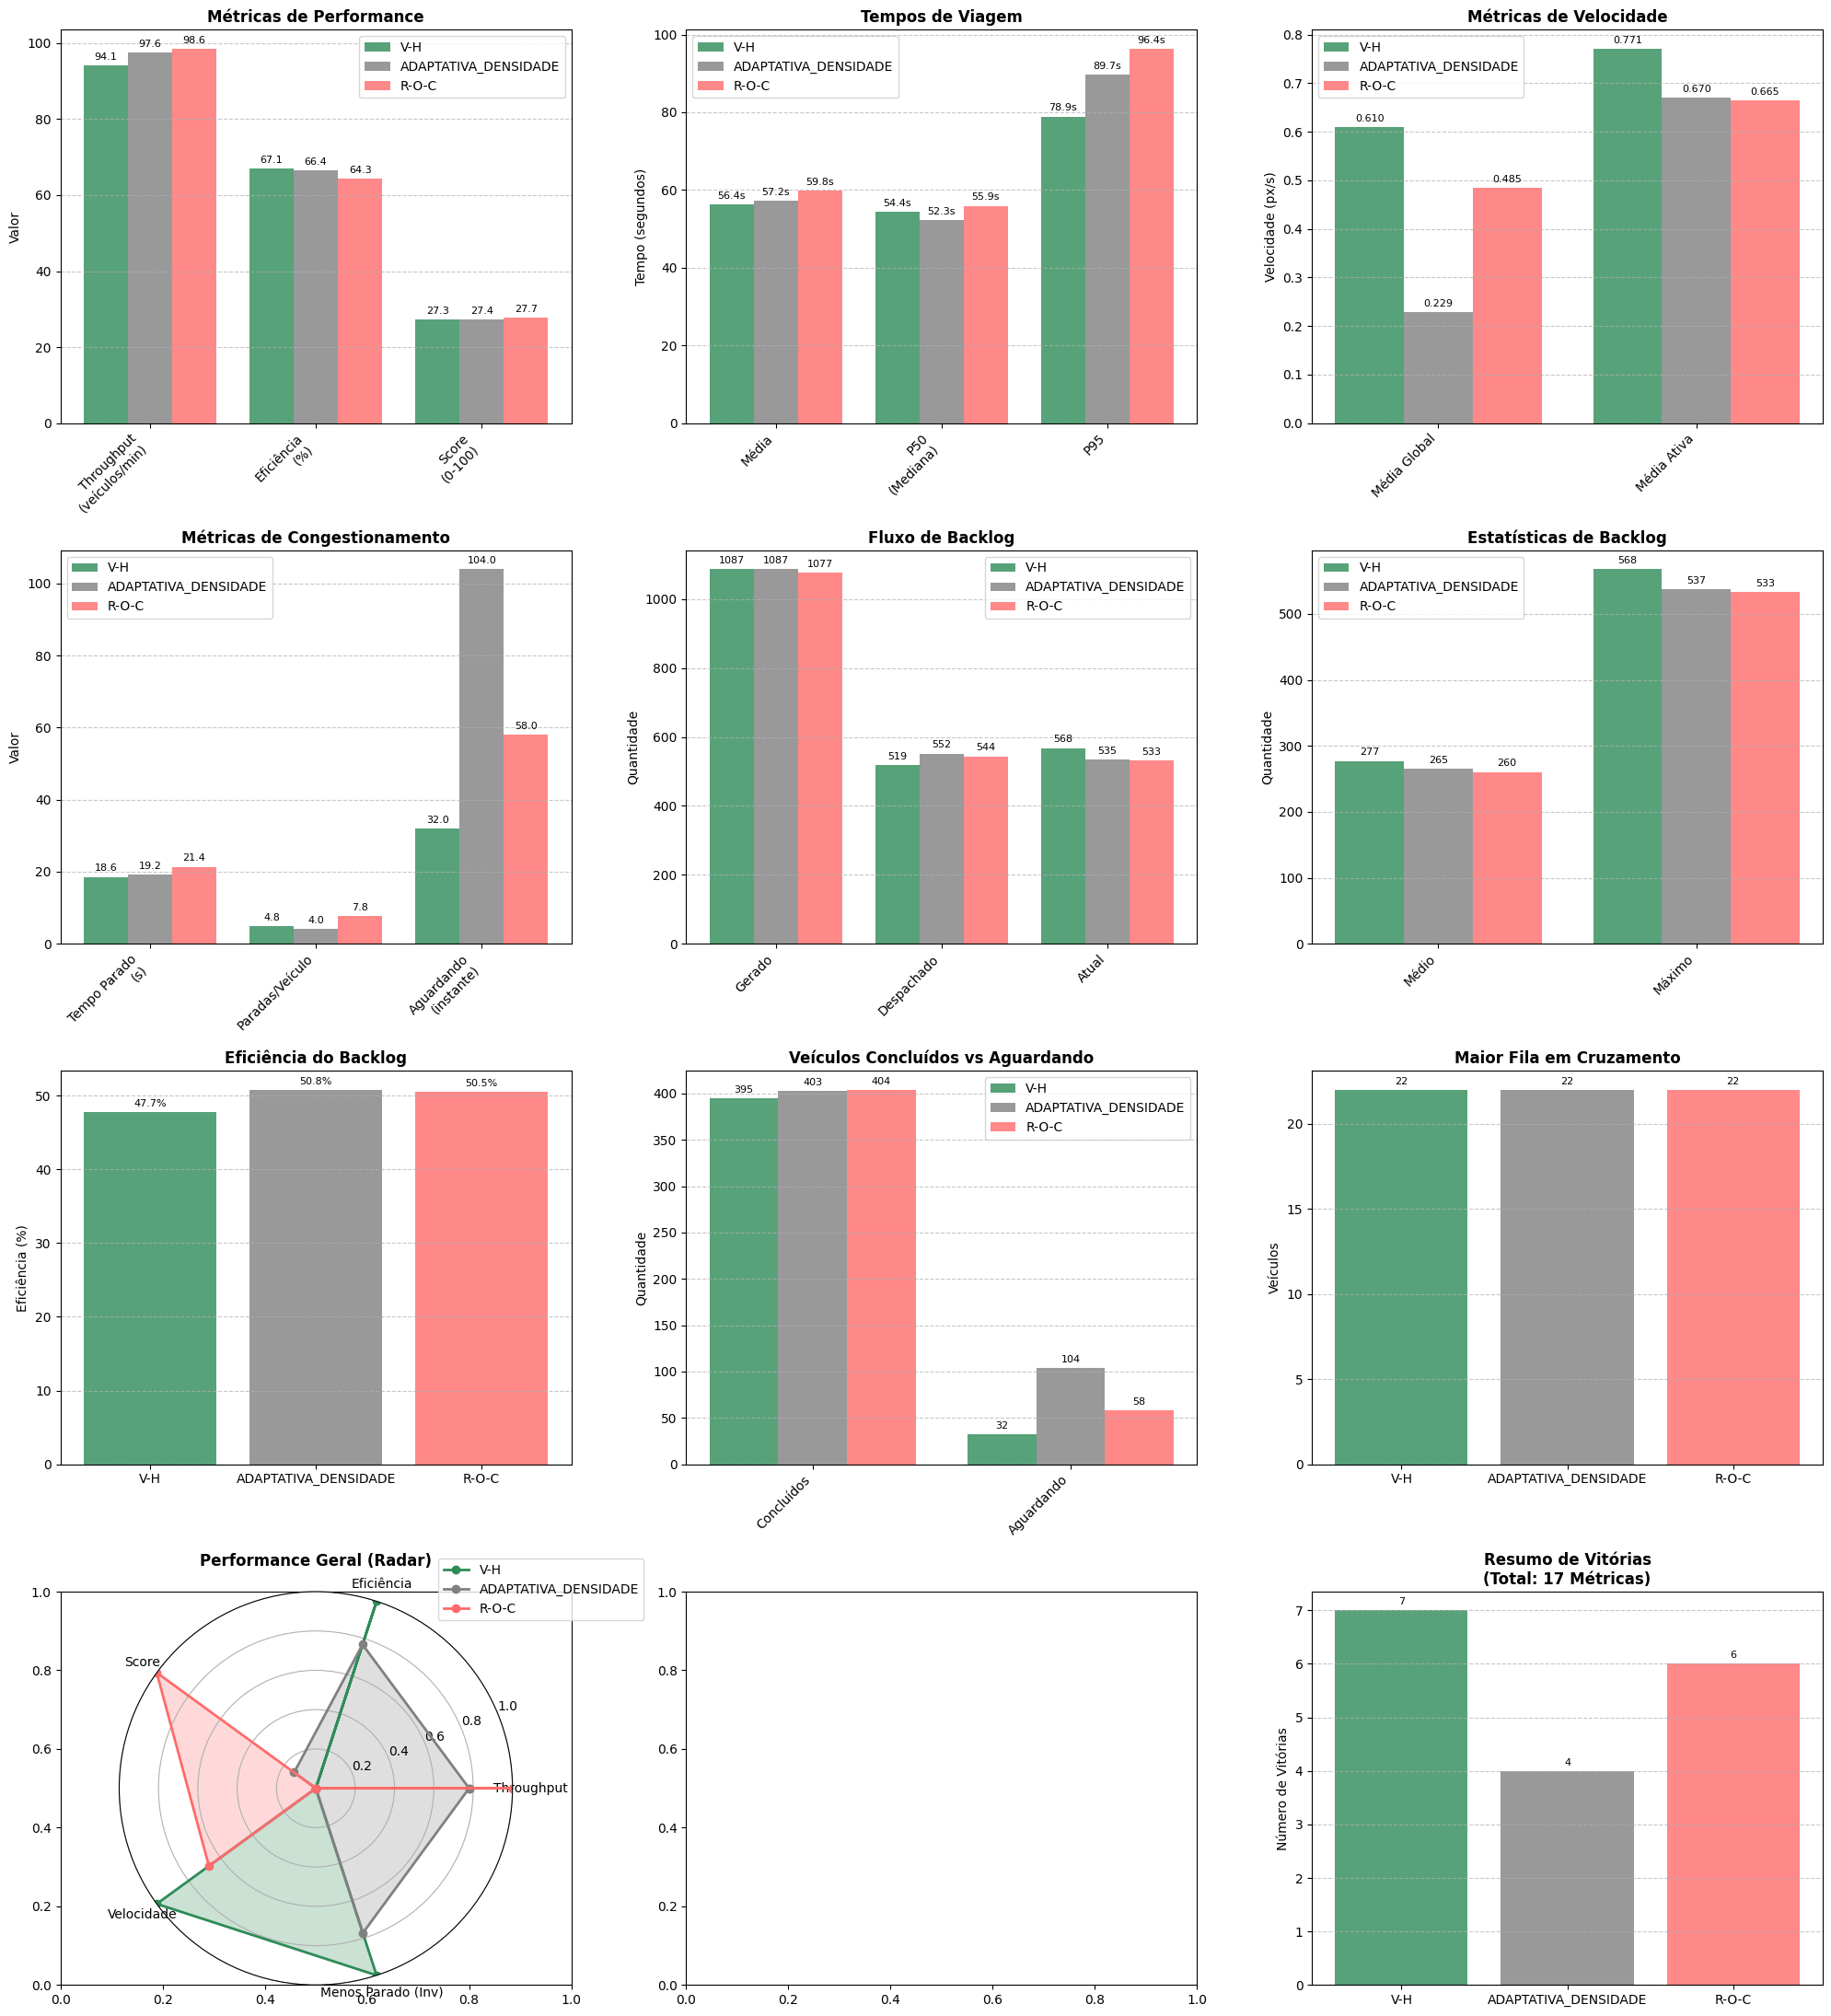

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- CONFIGURAÇÃO CENTRALIZADA ---

# Mapeamento de cores e nomes curtos para consistência
# Adicione novas heurísticas aqui para que os gráficos as reconheçam
CONFIG_HEURISTICAS = {
    'VERTICAL_HORIZONTAL': {
        'cor': '#2E8B57', # Verde
        'nome_curto': 'V-H'
    },
    'RANDOM_OPEN_CLOSE': {
        'cor': '#FF6B6B', # Vermelho
        'nome_curto': 'R-O-C'
    },
    # Exemplo se você adicionar uma nova:
    # 'NOVA_HEURISTICA': {
    #     'cor': '#4D96FF', # Azul
    #     'nome_curto': 'NOVA'
    # }
}

# Definição de métricas para o gráfico de "Vitórias"
# Métricas onde um valor MAIOR é melhor
METRICAS_MAIOR_MELHOR = [
    'throughput_por_minuto', 'eficiencia_media', 'score_heuristica',
    'velocidade_media_global_px_s', 'velocidade_media_ativa',
    'veiculos_concluidos', 'backlog_despachado_total'
]
# Métricas onde um valor MENOR é melhor
METRICAS_MENOR_MELHOR = [
    'tempo_viagem_medio', 'tempo_parado_medio', 'paradas_media_por_veiculo',
    'veiculos_aguardando_instante', 'backlog_total_atual', 'backlog_medio',
    'backlog_max_total', 'maior_fila_cruzamento_atual', 'tempo_viagem_p50',
    'tempo_viagem_p95'
]


# --- 1. CARREGAMENTO DE DADOS ---

def carregar_relatorios(pasta_relatorios: str) -> pd.DataFrame:
    """
    Carrega dinamicamente todos os arquivos .json de uma pasta especificada,
    achatando a estrutura do JSON e retornando um DataFrame do Pandas.
    """
    caminho_pasta = Path(pasta_relatorios)
    arquivos_json = list(caminho_pasta.glob('*.json'))
    
    if not arquivos_json:
        print(f"AVISO: Nenhum arquivo .json encontrado em '{pasta_relatorios}'")
        return pd.DataFrame()

    print(f"Encontrados {len(arquivos_json)} arquivos de relatório.")
    
    lista_relatorios = []
    for arquivo in arquivos_json:
        try:
            with open(arquivo, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Achatamento (flatten) automático do JSON
                # Isso é escalável: novas métricas no JSON serão adicionadas
                # sem precisar alterar este código.
                relatorio_flat = {
                    **data.get('simulacao', {}),
                    **data.get('metricas', {}),
                    **data.get('configuracao', {})
                }
                
                # Adiciona o nome do arquivo para referência, se necessário
                relatorio_flat['arquivo_origem'] = arquivo.name
                
                lista_relatorios.append(relatorio_flat)
        
        except json.JSONDecodeError:
            print(f"ERRO: Erro ao decodificar JSON: {arquivo.name}")
        except KeyError as e:
            print(f"ERRO: Chave ausente no arquivo {arquivo.name}: {e}")
        except Exception as e:
            print(f"ERRO: Erro inesperado ao processar {arquivo.name}: {e}")

    if not lista_relatorios:
        print("ERRO: Nenhum relatório pôde ser carregado com sucesso.")
        return pd.DataFrame()

    return pd.DataFrame(lista_relatorios)


# --- 2. FUNÇÕES AUXILIARES DE PLOTAGEM ---

def _adicionar_labels_barras(ax, bars_list, value_format: str, max_val: float):
    """Função auxiliar para adicionar rótulos de valor no topo das barras."""
    for bars in bars_list:
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2.,
                height + max_val * 0.01, # Pequeno offset acima da barra
                value_format.format(height),
                ha='center',
                va='bottom',
                fontsize=8
            )

def _plotar_comparacao_barras(
    ax: plt.Axes,
    df: pd.DataFrame,
    metricas_map: dict,
    heuristica_lista: list,
    title: str,
    ylabel: str,
    value_format: str = '{:.1f}'
):
    """
    Função auxiliar genérica para criar um gráfico de barras comparativo
    para N heurísticas e N métricas.
    """
    num_heuristics = len(heuristica_lista)
    num_metricas = len(metricas_map.keys())
    x = np.arange(num_metricas)
    
    # Define a largura das barras dinamicamente
    total_width = 0.8
    width = total_width / num_heuristics
    all_bars = []
    all_values = []

    for i, heuristica in enumerate(heuristica_lista):
        # Calcula o deslocamento (offset) para cada barra
        offset = (i - (num_heuristics - 1) / 2) * width
        
        # Obtém valores do DataFrame
        try:
            dados_heuristica = df[df['heuristica'] == heuristica].iloc[0]
            valores = [dados_heuristica.get(metrica, 0) for metrica in metricas_map.keys()]
            all_values.extend(valores)
        except IndexError:
            print(f"AVISO: Heurística '{heuristica}' não encontrada nos dados para o gráfico '{title}'")
            valores = [0] * num_metricas
            all_values.extend(valores)

        config = CONFIG_HEURISTICAS.get(heuristica, {'cor': 'gray', 'nome_curto': heuristica})
        
        bars = ax.bar(
            x + offset,
            valores,
            width,
            label=config['nome_curto'],
            color=config['cor'],
            alpha=0.8
        )
        all_bars.append(bars)

    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(metricas_map.values(), rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    max_val = max(all_values) if all_values else 1
    _adicionar_labels_barras(ax, all_bars, value_format, max_val)


def calcular_vitorias(df: pd.DataFrame, heuristica_lista: list) -> dict:
    """Calcula o número de 'vitórias' para cada heurística com base nas listas de métricas."""
    vitorias = {h: 0 for h in heuristica_lista}
    
    # Agrupa os dados pela primeira ocorrência de cada heurística
    df_grouped = df.groupby('heuristica').first()

    for metrica in METRICAS_MAIOR_MELHOR:
        if metrica in df_grouped.columns:
            try:
                # idxmax() retorna o índice (nome da heurística) do valor máximo
                vencedor = df_grouped[metrica].idxmax()
                vitorias[vencedor] += 1
            except ValueError:
                pass # Ignora se todos os valores forem NaN

    for metrica in METRICAS_MENOR_MELHOR:
        if metrica in df_grouped.columns:
            try:
                # idxmin() retorna o índice (nome da heurística) do valor mínimo
                vencedor = df_grouped[metrica].idxmin()
                vitorias[vencedor] += 1
            except ValueError:
                pass

    return vitorias


# --- 3. FUNÇÃO PRINCIPAL DE PLOTAGEM ---

def gerar_visualizacoes_comparativas(df: pd.DataFrame):
    """
    Função principal que cria e exibe o dashboard de visualizações
    comparando todas as heurísticas encontradas no DataFrame.
    """
    
    # Descobre as heurísticas presentes no DataFrame
    heuristica_lista = df['heuristica'].unique().tolist()
    print(f"Gerando visualizações para: {', '.join(heuristica_lista)}")
    
    # Cria a figura e os eixos (subplots)
    fig, axes = plt.subplots(4, 3, figsize=(20, 22))
    axes = axes.flatten() # Transforma a matriz 2D de eixos em um vetor 1D

    # --- Gráfico 1: Métricas de Performance ---
    metricas_map = {
        'throughput_por_minuto': 'Throughput\n(veículos/min)',
        'eficiencia_media': 'Eficiência\n(%)',
        'score_heuristica': 'Score\n(0-100)'
    }
    _plotar_comparacao_barras(
        axes[0], df, metricas_map, heuristica_lista,
        'Métricas de Performance', 'Valor', '{:.1f}'
    )

    # --- Gráfico 2: Tempos de Viagem ---
    metricas_map = {
        'tempo_viagem_medio': 'Média',
        'tempo_viagem_p50': 'P50\n(Mediana)',
        'tempo_viagem_p95': 'P95'
    }
    _plotar_comparacao_barras(
        axes[1], df, metricas_map, heuristica_lista,
        'Tempos de Viagem', 'Tempo (segundos)', '{:.1f}s'
    )

    # --- Gráfico 3: Velocidades ---
    metricas_map = {
        'velocidade_media_global_px_s': 'Média Global',
        'velocidade_media_ativa': 'Média Ativa'
    }
    _plotar_comparacao_barras(
        axes[2], df, metricas_map, heuristica_lista,
        'Métricas de Velocidade', 'Velocidade (px/s)', '{:.3f}'
    )

    # --- Gráfico 4: Congestionamento ---
    metricas_map = {
        'tempo_parado_medio': 'Tempo Parado\n(s)',
        'paradas_media_por_veiculo': 'Paradas/Veículo',
        'veiculos_aguardando_instante': 'Aguardando\n(instante)'
    }
    _plotar_comparacao_barras(
        axes[3], df, metricas_map, heuristica_lista,
        'Métricas de Congestionamento', 'Valor', '{:.1f}'
    )

    # --- Gráfico 5: Fluxo de Backlog ---
    metricas_map = {
        'backlog_gerado_total': 'Gerado',
        'backlog_despachado_total': 'Despachado',
        'backlog_total_atual': 'Atual'
    }
    _plotar_comparacao_barras(
        axes[4], df, metricas_map, heuristica_lista,
        'Fluxo de Backlog', 'Quantidade', '{:.0f}'
    )

    # --- Gráfico 6: Estatísticas de Backlog ---
    metricas_map = {
        'backlog_medio': 'Médio',
        'backlog_max_total': 'Máximo'
    }
    _plotar_comparacao_barras(
        axes[5], df, metricas_map, heuristica_lista,
        'Estatísticas de Backlog', 'Quantidade', '{:.0f}'
    )

    # --- Gráfico 7: Eficiência do Backlog (Gráfico customizado) ---
    ax = axes[6]
    nomes = []
    valores = []
    cores = []
    max_val = 0
    for heuristica in heuristica_lista:
        config = CONFIG_HEURISTICAS.get(heuristica, {'cor': 'gray', 'nome_curto': heuristica})
        try:
            dados = df[df['heuristica'] == heuristica].iloc[0]
            eff = (dados['backlog_despachado_total'] / dados['backlog_gerado_total']) * 100
        except (ZeroDivisionError, KeyError, IndexError):
            eff = 0
        
        nomes.append(config['nome_curto'])
        valores.append(eff)
        cores.append(config['cor'])
        max_val = max(max_val, eff)

    bars = ax.bar(nomes, valores, color=cores, alpha=0.8)
    ax.set_title('Eficiência do Backlog', fontweight='bold')
    ax.set_ylabel('Eficiência (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    _adicionar_labels_barras(ax, [bars], '{:.1f}%', max_val)

    # --- Gráfico 8: Veículos Concluídos vs Aguardando ---
    metricas_map = {
        'veiculos_concluidos': 'Concluídos',
        'veiculos_aguardando_instante': 'Aguardando'
    }
    _plotar_comparacao_barras(
        axes[7], df, metricas_map, heuristica_lista,
        'Veículos Concluídos vs Aguardando', 'Quantidade', '{:.0f}'
    )

    # --- Gráfico 9: Maior Fila (Gráfico customizado) ---
    ax = axes[8]
    nomes = []
    valores = []
    cores = []
    max_val = 0
    for heuristica in heuristica_lista:
        config = CONFIG_HEURISTICAS.get(heuristica, {'cor': 'gray', 'nome_curto': heuristica})
        try:
            dados = df[df['heuristica'] == heuristica].iloc[0]
            fila = dados.get('maior_fila_cruzamento_atual', 0)
        except IndexError:
            fila = 0
        
        nomes.append(config['nome_curto'])
        valores.append(fila)
        cores.append(config['cor'])
        max_val = max(max_val, fila)
        
    bars = ax.bar(nomes, valores, color=cores, alpha=0.8)
    ax.set_title('Maior Fila em Cruzamento', fontweight='bold')
    ax.set_ylabel('Veículos')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    _adicionar_labels_barras(ax, [bars], '{:.0f}', max_val)


    # --- Gráfico 10: Radar Chart (Gráfico customizado polar) ---
    # Usar plt.subplot diretamente para criar um eixo polar
    ax = plt.subplot(4, 3, 10, projection='polar')
    
    # Métricas para o radar. Menor é melhor para 'tempo_parado_medio'.
    metricas_radar_raw = {
        'throughput_por_minuto': 'Throughput',
        'eficiencia_media': 'Eficiência',
        'score_heuristica': 'Score',
        'velocidade_media_global_px_s': 'Velocidade',
        'tempo_parado_medio': 'Menos Parado (Inv)' # Invertido
    }
    labels_radar = list(metricas_radar_raw.values())
    
    # Normaliza os dados para o radar (0-1)
    df_grouped = df.groupby('heuristica').first()
    dados_normalizados = {}
    
    for metrica_raw in metricas_radar_raw.keys():
        if metrica_raw not in df_grouped.columns:
            continue
            
        max_val = df_grouped[metrica_raw].max()
        min_val = df_grouped[metrica_raw].min()
        
        # Evita divisão por zero se todos os valores forem iguais
        if max_val == min_val: max_val += 1e-6 
        
        for heuristica in heuristica_lista:
            if heuristica not in dados_normalizados:
                dados_normalizados[heuristica] = []
            
            # Garante que a heurística existe no dataframe agrupado
            if heuristica not in df_grouped.index:
                valor_raw = 0
            else:
                valor_raw = df_grouped.loc[heuristica, metrica_raw]
            
            if metrica_raw == 'tempo_parado_medio':
                # Inverte a métrica (menor é melhor)
                norm_val = 1 - ((valor_raw - min_val) / (max_val - min_val))
            else:
                # Métrica normal (maior é melhor)
                norm_val = (valor_raw - min_val) / (max_val - min_val)
                
            dados_normalizados[heuristica].append(norm_val)

    angles = np.linspace(0, 2 * np.pi, len(labels_radar), endpoint=False).tolist()
    angles += angles[:1] # Fecha o círculo
    
    for heuristica in heuristica_lista:
        if not dados_normalizados.get(heuristica):
            continue # Pula se os dados não foram calculados
            
        valores = dados_normalizados[heuristica] + dados_normalizados[heuristica][:1]
        config = CONFIG_HEURISTICAS.get(heuristica, {'cor': 'gray', 'nome_curto': heuristica})
        
        ax.plot(angles, valores, 'o-', linewidth=2, label=config['nome_curto'], color=config['cor'])
        ax.fill(angles, valores, alpha=0.25, color=config['cor'])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_radar)
    ax.set_ylim(0, 1)
    ax.set_title('Performance Geral (Radar)', fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1))

    # --- Gráfico 11: Resumo de Vitórias (Gráfico customizado) ---
    ax = axes[11] # Usando o último eixo disponível
    vitorias = calcular_vitorias(df, heuristica_lista)
    
    nomes = []
    valores = []
    cores = []
    max_val = 0
    
    for heuristica, contagem in vitorias.items():
        config = CONFIG_HEURISTICAS.get(heuristica, {'cor': 'gray', 'nome_curto': heuristica})
        nomes.append(config['nome_curto'])
        valores.append(contagem)
        cores.append(config['cor'])
        max_val = max(max_val, contagem)
        
    bars = ax.bar(nomes, valores, color=cores, alpha=0.8)
    ax.set_title(f'Resumo de Vitórias\n(Total: {len(METRICAS_MAIOR_MELHOR) + len(METRICAS_MENOR_MELHOR)} Métricas)', fontweight='bold')
    ax.set_ylabel('Número de Vitórias')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    _adicionar_labels_barras(ax, [bars], '{:.0f}', max_val)

    # --- Finalização ---
    fig.tight_layout()
    plt.show()


# --- 4. EXECUÇÃO PRINCIPAL ---

def main():
    """Função principal para executar o script."""
    PASTA_RELATORIOS = 'relatorios'
    
    df = carregar_relatorios(PASTA_RELATORIOS)
    
    if df.empty:
        print("ERRO: Nenhum dado foi carregado. Encerrando o script.")
        return

    # Mensagens de status originais do seu script
    print("📊 Dados carregados com sucesso!")
    print(f"🔍 Heurísticas analisadas: {', '.join(df['heuristica'].unique())}")
    print(f"📈 Total de registros: {len(df)}")
    
    # Exibe as primeiras linhas do DataFrame para verificação
    print("\n--- Amostra dos Dados Carregados ---")
    print(df.head())
    print("--------------------------------------\n")
    
    # Gera as visualizações
    gerar_visualizacoes_comparativas(df)

if __name__ == "__main__":
    main()